# Part II: Feature Extraction, Visualization and Statistic

## Feature Extraction

In [1]:
# import librarues
import pandas as pd
import string
import collections
import nltk

In [2]:
# read CSV files
df = pd.read_csv("thebiglist_clean.csv")
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [3]:
# get the Variety column
variety = df['Variety']
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3687    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3688                       Oriental Style Instant Noodles
3689                                       Tom Yum Shrimp
3690                                 Tom Yum Chili Flavor
3691                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [4]:
variety_text = " ".join(variety)
variety_text

'Seafood Sara Udon Chongqing Spicy & Sour Rice Noodles Seafood Flavour Sichuan Spicy Noodle Jiangnan Style Noodle - Original Flavour CupStar Shio Ramen Big Boss Broad Noodle Chili Oil Flavor (Sour & Hot) Top Ramen Masala Noodles Miyashi Chuka Cold Noodle Tanukioyaji Super Spicy Mazemen Michio Kawamura Nature Ramen Shio Mochichi Wonton Noodle Instant Yakosoba XL Chajang (Bean Sauce) Flavor Spicy Baby Clam Flavor Cup Instant Rice Noodles Oriental Kitchen Hot Korean Instant Noodles Coconut Chicken Curry Rice Noodle Soup Shoyu Flavor Karaage Ginger Shio Ramen Raoh Soy Sauce Flavor Ramen Souper Bowl Noodle Pho Rice Noodle Mild Sekai no Yamachan Phantom Chicken Wings Yakisoba Artificial Beef With Sauerkraut Quick Pasta Creamy Icon Ramen Noodles Creamy Chicken Gumbo Mi Instant Rasa Vegetarian Shin Red Super Spicy Buldak Challenge Daimori Osaka Kasoudon Pepper Sesame Red Oil Sesame Paste Fragrant In Original Taste Sesame Paste Kiseki Ramen Chicken Flavor Ramen Hotter & Spicier Ramen Beef Flavo

In [5]:
variety_text_lower = variety_text.lower()
variety_text_lower

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [6]:
# remove punctuation
punc_list = list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [7]:
variety_clean = "".join([char for char in variety_text_lower if char not in punc_list])
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [8]:
# tokenize text
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [9]:
variety_counter = collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [10]:
variety_counter.most_common()

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [11]:
is_spicy = []

hot_flavor = ['spicy', 'curry', 'hot',
              'tom', 'chili', 'chilli',
              'kari', 'pedas', 'laksa']

In [13]:
for variety in df['Variety'][:10].str.lower():
    if any(flavor in variety for flavor in hot_flavor):
        print(variety)

chongqing spicy & sour rice noodles
seafood flavour sichuan spicy noodle
big boss broad noodle chili oil flavor (sour & hot)
tanukioyaji super spicy mazemen


In [14]:
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in hot_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
        
df['isSpicy'] = is_spicy
df

,Brand,Variety,Style,Country,Stars,isSpicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


In [15]:
has_chicken = []

for variety in df['Variety'].str.lower():
    if ('chicken' in variety) or ('ayam' in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
        
df['hasChicken'] = has_chicken
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0
...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0


In [17]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken
1299,Nissin,Cup Noodles Prawn Flavour,Cup,Hong Kong,3.75,0,0
2938,Nongshim,Ansungtangmyun (US Version),Pack,United States,3.75,0,0
3452,Sanyo Foods,Aunt Mentaiko Durum Spaghetti,Bowl,Japan,4.50,0,0
2448,Unif,Unif-100 Pickled Cayenne Flavor Beef Ramen,Pack,China,3.75,0,0
1377,Nissin,Cup Noodle Spicy Curry Chicken,Cup,Japan,5.00,1,1
850,Maruchan,Japanese Soba,Bowl,Japan,5.00,0,0
2317,Takamori Kosan,Spaghetti Napolitan,Pack,Japan,4.00,0,0
310,Marutai,Boh Ramen Shoyu Aji,Pack,Japan,5.00,0,0
616,Burung Layang Terbang,Kweitiau Kuah Rasa Ayam,Pack,Indonesia,3.50,0,1
1942,Mom's Dry Noodle,Spicy & Sour Flavor,Pack,Taiwan,5.00,1,0


In [18]:
has_beef = []

for variety in df['Variety'].str.lower():
    if ('beef' in variety) or ('cow' in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
        
df['hasBeef'] = has_beef
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0
...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0


In [20]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef
1763,Koh Thai,Island Of Flavours Lemongrass Instant Noodles ...,Pack,Netherlands,0.25,0,0,0
2272,Maruchan,I Want To Eat Ramen Shio,Pack,Japan,3.75,0,0,0
1701,Nissin,Cup Noodle Light Plus Ratatouille,Cup,Japan,4.50,0,0,0
2840,SuperMi,Sedaaap Mi Kuah Rasa Kari Ayam,Pack,Indonesia,4.00,1,1,0
1577,Nissin,Instant Noodles Tom Yum Shrimp Saab Flavour,Pack,Thailand,4.00,1,0,0
3284,Gomex,3 Mien Mi Tom Chua Cay Hot sour Shrimp,Pack,Vietnam,2.25,1,0,0
1337,Nongshim,Spicy Shrimp Cup Noodle,Cup,South Korea,4.00,1,0,0
2795,FMF,Chow Masala,Pack,Fiji,4.00,0,0,0
2694,Nongshim,Shin Ramyun Black Spicy Beef,Cup,South Korea,4.50,1,0,1
978,Yumei,Instant Spicy Hot Pot,Bowl,China,2.25,1,0,0


In [21]:
has_seafood = []

seafood_flavor = ['seafood', 'fish', 'shrimp',
                  'prawn', 'crab']

for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in seafood_flavor):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
        
df['hasSeafood'] = has_seafood
df

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


## Data Exploration

In [22]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# top 50 brands
brand_count = df['Brand'].value_counts()[:50]
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Acecook               48
Sau Tao               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Lucky Me!             34
Vina Acecook          34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
Vedan                 28
JML                   28
Wei Lih               28
Wai Wai               26
A-Sha Dry Noodle      26
Wu-Mu                 23
Yum Yum               23
Itsuki                20
Samyang               19
New Touch             18
Doll                  18
Sichuan Baijia        18
Koka                  18
Uni-President         18
Little Cook           17
Mr. Noodles           16
Batchelors            16
Daikoku               15


(array([  0., 100., 200., 300., 400., 500.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

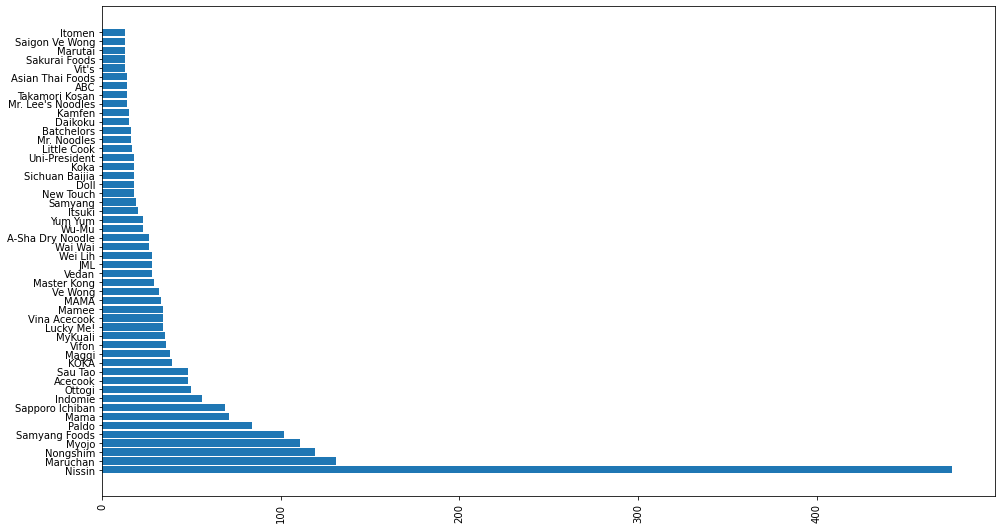

In [34]:
# plot a barplot for brand_count
plt.figure(figsize=(16,9))
plt.barh(brand_count.index, brand_count)
plt.xticks(rotation=90)
# plt.show()

In [37]:
brand_count.sort_values(ascending=True)

Itomen                13
Vit's                 13
Saigon Ve Wong        13
Marutai               13
Sakurai Foods         13
Asian Thai Foods      14
ABC                   14
Takamori Kosan        14
Mr. Lee's Noodles     14
Kamfen                15
Daikoku               15
Batchelors            16
Mr. Noodles           16
Little Cook           17
Koka                  18
Sichuan Baijia        18
Doll                  18
New Touch             18
Uni-President         18
Samyang               19
Itsuki                20
Yum Yum               23
Wu-Mu                 23
A-Sha Dry Noodle      26
Wai Wai               26
Wei Lih               28
Vedan                 28
JML                   28
Master Kong           29
Ve Wong               32
MAMA                  33
Mamee                 34
Vina Acecook          34
Lucky Me!             34
MyKuali               35
Vifon                 36
Maggi                 38
KOKA                  39
Sau Tao               48
Acecook               48


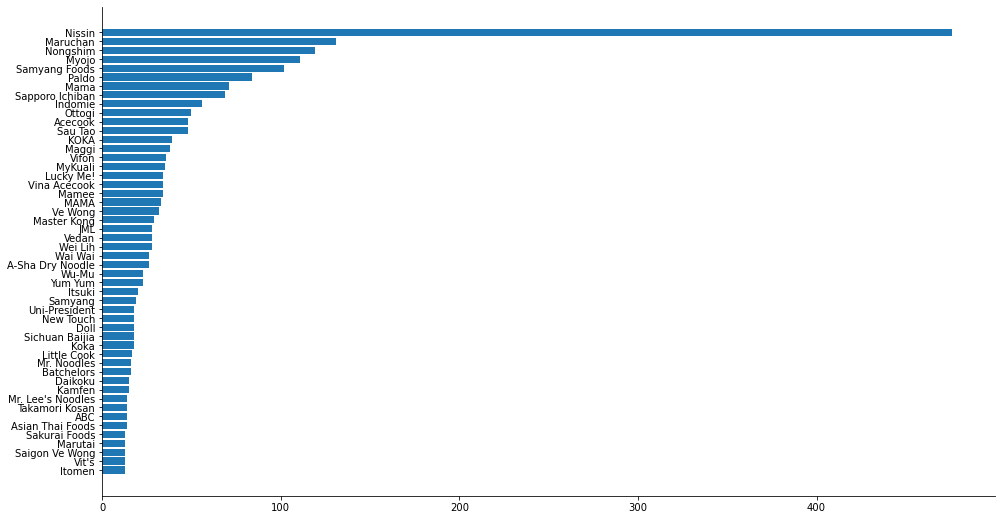

In [41]:
# plot a barplot for brand_count
plt.figure(figsize=(16,9))
plt.barh(brand_count.sort_values(ascending=True).index,
         brand_count.sort_values(ascending=True))
sns.despine()

In [43]:
# explore Style column
style_count = df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

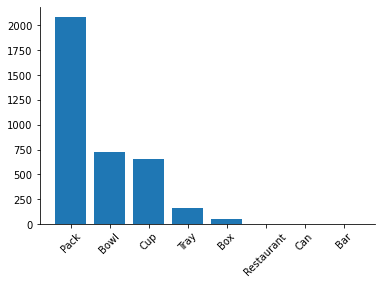

In [48]:
# plot a barplot for style_count
# plt.figure(figsize=(16,9))
plt.bar(style_count.index, style_count)
plt.xticks(rotation=45)
sns.despine()

In [49]:
# explore Country column
country_count = df['Country'].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
Colombia                6
France                  6
Poland                  6
Cambodia                5
Russia                  5
Sarawak                 5
Fiji                    4
Peru                    4
Holland                 4
Italy                   4
Dubai                   3
Spain                   3
Finland                 3
Israel      

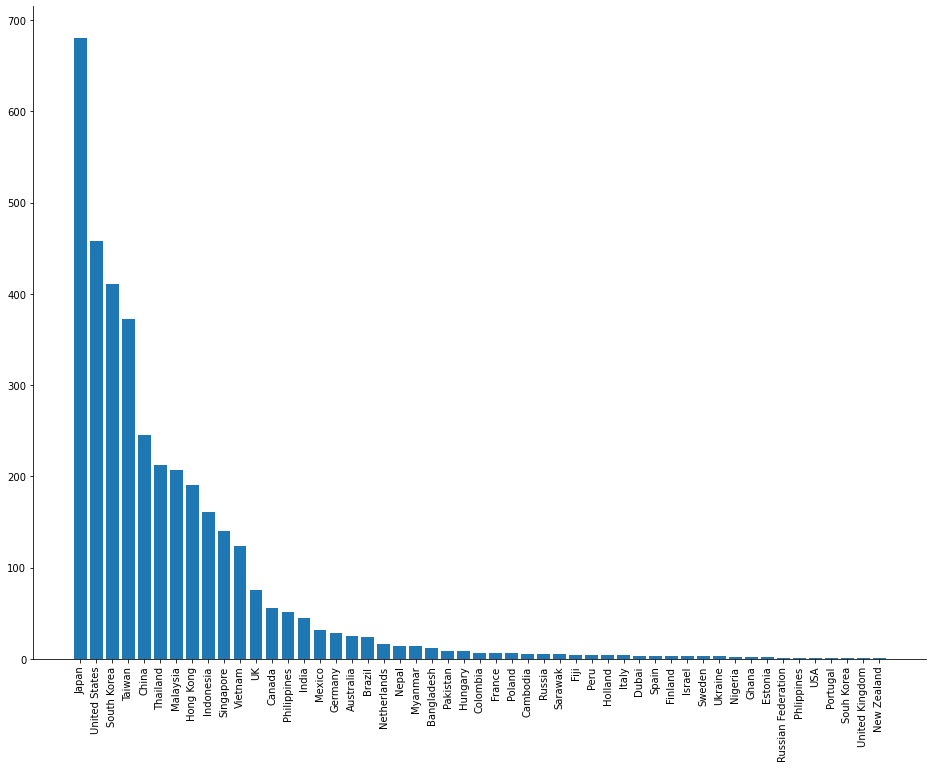

In [59]:
# plot a barplot for country_count
plt.figure(figsize=(16,12))
plt.bar(country_count.index, country_count)
plt.xticks(rotation=90)
sns.despine()

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

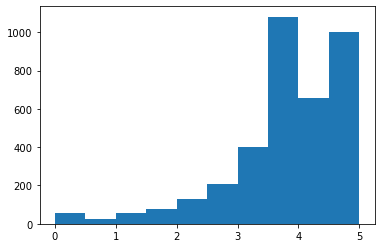

In [60]:
# examine the distribution of scores in 'Stars'
plt.hist(df['Stars'])

In [61]:
df['Stars'].mean()

3.722684182015168

In [62]:
df['Stars'].median()

3.75

<AxesSubplot:xlabel='isSpicy', ylabel='count'>

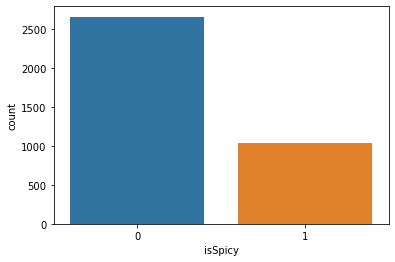

In [64]:
sns.countplot(x=df['isSpicy'])

<AxesSubplot:xlabel='hasChicken', ylabel='count'>

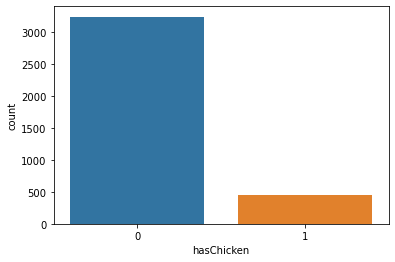

In [65]:
sns.countplot(x=df['hasChicken'])

<AxesSubplot:xlabel='hasBeef', ylabel='count'>

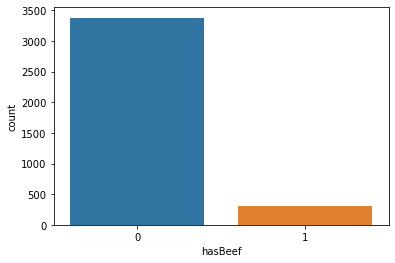

In [66]:
sns.countplot(x=df['hasBeef'])

<AxesSubplot:xlabel='hasSeafood', ylabel='count'>

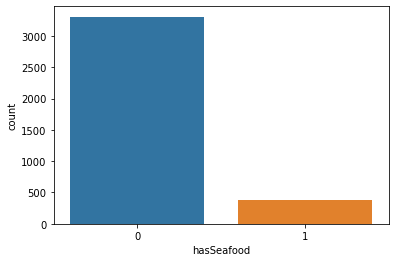

In [67]:
sns.countplot(x=df['hasSeafood'])

Question to ask:
1. Which brand has the highest Stars?
2. Which country has the highest Stars?
3. Which noodle has the highest Stars -spicy or non-spicy?

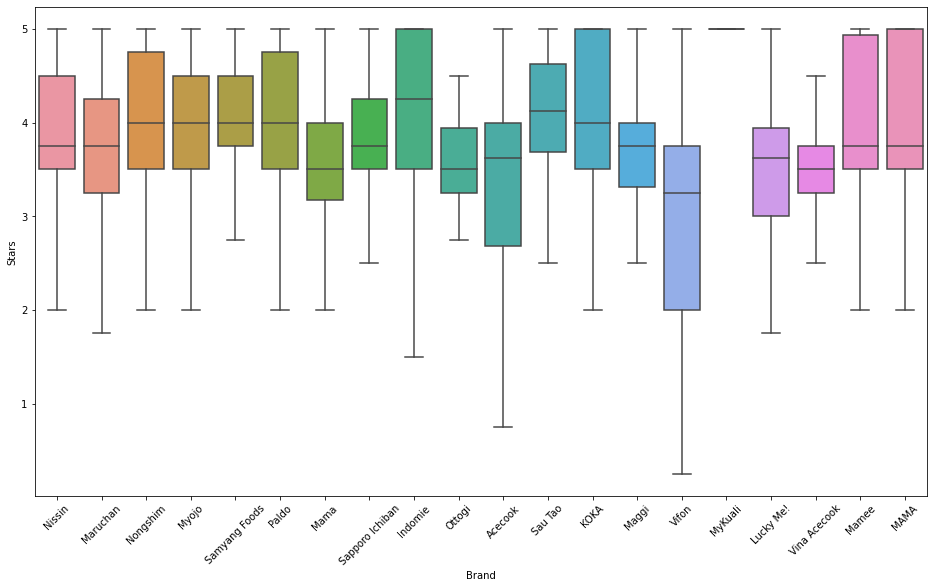

In [82]:
# Question 1: Which brand has the highest Stars?
plt.figure(figsize=(16,9))
sns.boxplot(x=df['Brand'], y=df['Stars'],
            order=brand_count.index[:20],
            showfliers=False)
plt.xticks(rotation=45)
plt.show()

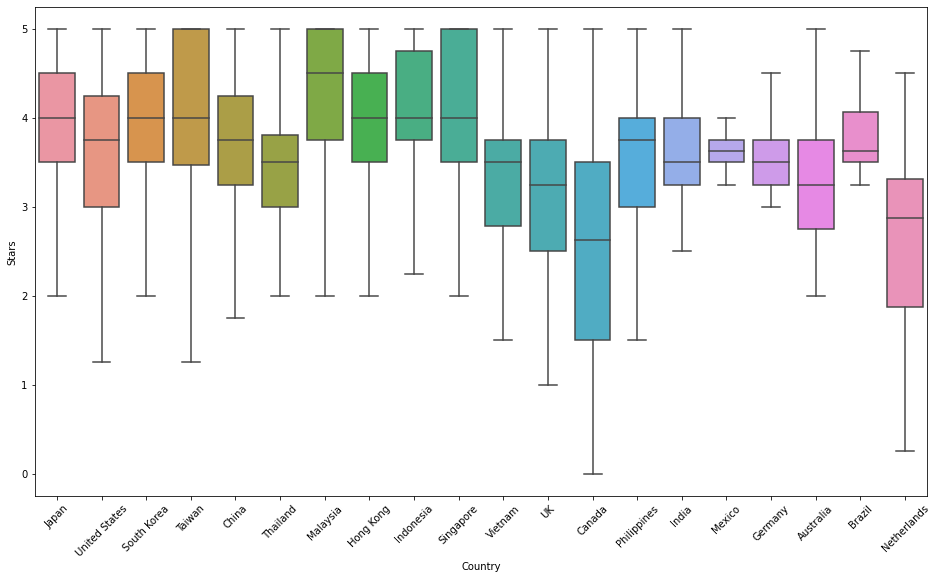

In [83]:
# Question 2: Which country has the highest Stars?
plt.figure(figsize=(16,9))
sns.boxplot(x=df['Country'], y=df['Stars'],
            order=country_count.index[:20],
            showfliers=False)
plt.xticks(rotation=45)
plt.show()

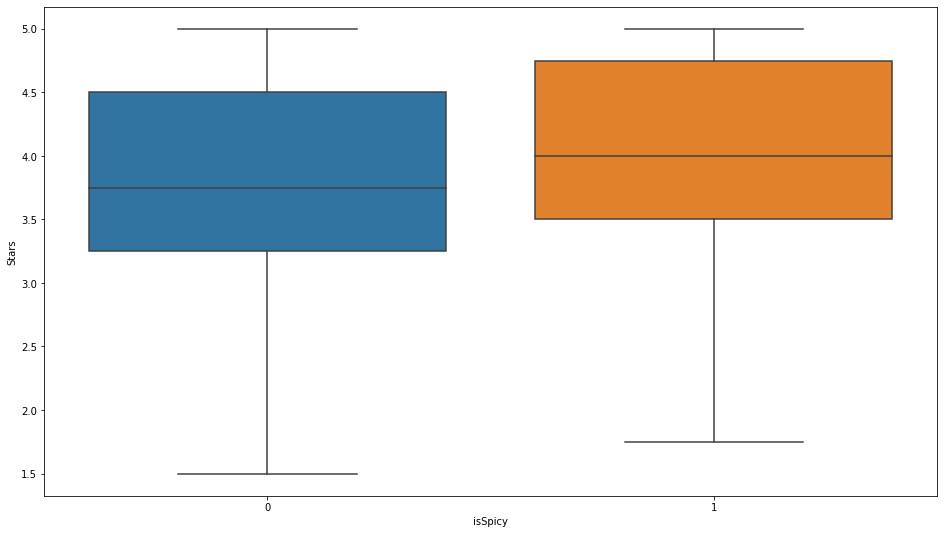

In [86]:
# Question 3: Which noodle has the highest Stars -spicy or non-spicy?
plt.figure(figsize=(16,9))
sns.boxplot(x=df['isSpicy'], y=df['Stars'],
            showfliers=False)
plt.show()

In [88]:
# filter two DataFrame
spicy_df = df[df['isSpicy'] == 1]
nonspicy_df = df[df['isSpicy'] == 0]

In [91]:
print(spicy_df['Stars'].mean())
print(nonspicy_df['Stars'].mean())

3.845135527589545
3.675112824370064


In [92]:
print(spicy_df['Stars'].median())
print(nonspicy_df['Stars'].median())

4.0
3.75


(array([ 44.,  17.,  43.,  64.,  83., 171., 309., 799., 453., 676.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

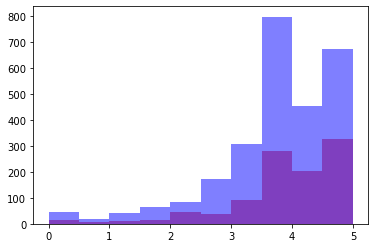

In [98]:
plt.hist(spicy_df['Stars'], alpha=0.5, color='red')
plt.hist(nonspicy_df['Stars'], alpha=0.5, color='blue')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Stars', ylabel='Density'>

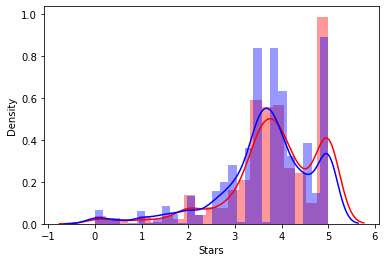

In [103]:
sns.distplot(spicy_df['Stars'], color='red')
sns.distplot(nonspicy_df['Stars'], color='blue')

In [104]:
# import mann-whitney u test
from scipy.stats import mannwhitneyu

In [105]:
mannwhitneyu(spicy_df['Stars'], nonspicy_df['Stars'])

MannwhitneyuResult(statistic=1220814.5, pvalue=6.244898720575498e-08)

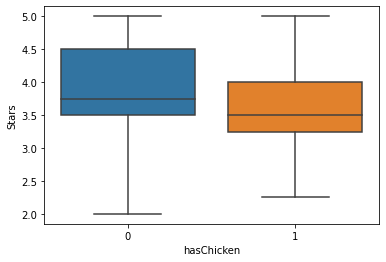

In [108]:
sns.boxplot(x=df['hasChicken'], y=df['Stars'], showfliers=False)
plt.show()

In [109]:
mannwhitneyu(df[df['hasChicken'] == 0]['Stars'],
             df[df['hasChicken'] == 1]['Stars'])

MannwhitneyuResult(statistic=593212.0, pvalue=2.2524646495376065e-10)

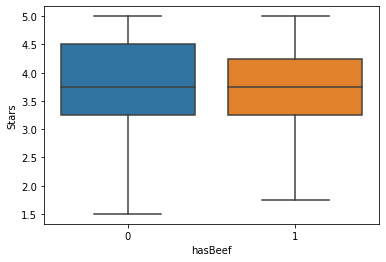

In [110]:
sns.boxplot(x=df['hasBeef'], y=df['Stars'], showfliers=False)
plt.show()

In [111]:
mannwhitneyu(df[df['hasBeef'] == 0]['Stars'],
             df[df['hasBeef'] == 1]['Stars'])

MannwhitneyuResult(statistic=476664.5, pvalue=0.0017956542204848806)

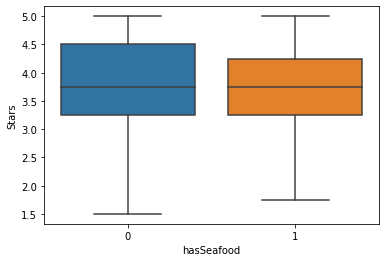

In [112]:
sns.boxplot(x=df['hasSeafood'], y=df['Stars'], showfliers=False)
plt.show()

In [113]:
mannwhitneyu(df[df['hasSeafood'] == 0]['Stars'],
             df[df['hasSeafood'] == 1]['Stars'])

MannwhitneyuResult(statistic=626226.5, pvalue=0.298820092010756)

In [114]:
df.to_csv('thebiglist_clean_extended.csv', index=None)

In [115]:
pd.read_csv('thebiglist_clean_extended.csv')

,Brand,Variety,Style,Country,Stars,isSpicy,hasChicken,hasBeef,hasSeafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


Summary:
1. Examined the Variety column
2. Extraction useful information from Variety
    - isSpicy
    - hasChicken
    - hasBeef
    - hasSeafood
3. Performed visualizations to answer several question
4. Exported the extended DataFrame